## Observations and Insights

### Tumor Statistics per Drug Regimen and Bar Plot

Following are some observations from the tumor volume statistics:

1)	Mice being treated with Capomulin and Ramicane drugs have similar average tumor volume , which is about 25% less than the average tumor volume of Mice that are being treated with other drugs.

2)	The number of data points for the group of mice being treated with Capomulin and Ramicane drugs is similar.

3)	For mice being treated with Ketrapril,Naftisol, Placebo and stelasyn drugs , there is a large variance in tumor volumes, indicating that the tumor volumes in the data set for these drugs are spread out far from the mean and from each other.


### Pie Plot

Pie plot for distribution of female versus male mice show that the research used almost equal number of male and female mice for the study of their responses to different treatment regimens.

### Box Plot

The Box plot for final tumor volumes across the four treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin, show :

1) The final tumor volumes of mice being treated with  Capomulin and Ramicane have a similar range. Mice being treated with Infubinol and Ceftamin also have similar range of final tumor values, and are higher than that of other two drugs.

2) While there are no outliers identified for other drugs ,one mice(Mouse ID c326) who was treated with Infubinol has been identified as an outlier. Data for this mouse is available only for the first 5 days of the treatment. 

3) The box plot also shows that mice being treated with Capomulin and Ceftamin have final tumor volumes that spread out far from the middle value(median), hence there is more variability in the data points.

### Line Graph

The line graph "Tumor response to Capomulin regimen (Mouse ID s185 )" shows that this mouse has responded very well to Capomulin treatment ; the tumors volume have shrunk(~48%) in the course of the treatment.

### Correlation and Linear regression Model

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.8419, which shows that there is a strong positive linear relationship between the two factors.

The R-squared value of the linear regression model shows that about 84% of the variation in tumor volume of mice in Capomulin regimen is due to the variation in their weight.


## Dependencies and starter code

In [1]:
%matplotlib notebook

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#This stops the graphs from overwriting each other
plt.ioff() 

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")

mouse_study_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Grouped by Drug Regimen
mouse_study_results_grouped = mouse_study_results_df.groupby(["Drug Regimen"])

#Mean
mean_tumor_vol = mouse_study_results_grouped["Tumor Volume (mm3)"].mean()

#Median
median_tumor_vol = mouse_study_results_grouped["Tumor Volume (mm3)"].median()

#Variance
variance_tumor_vol = mouse_study_results_grouped["Tumor Volume (mm3)"].var()

#Standard Deviation
stddev_tumor_vol = mouse_study_results_grouped["Tumor Volume (mm3)"].std()

#Standard Error
sem_tumor_vol = mouse_study_results_grouped["Tumor Volume (mm3)"].sem()


Tumor_vol_statistics = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                                     "Median Tumor Volume":median_tumor_vol,
                                     "Variance Tumor Volume":variance_tumor_vol,
                                     "Std Deviation Tumor Volume":stddev_tumor_vol,
                                     "Std Error Tumor Volume": sem_tumor_vol})

Tumor_vol_statistics



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Deviation Tumor Volume,Std Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


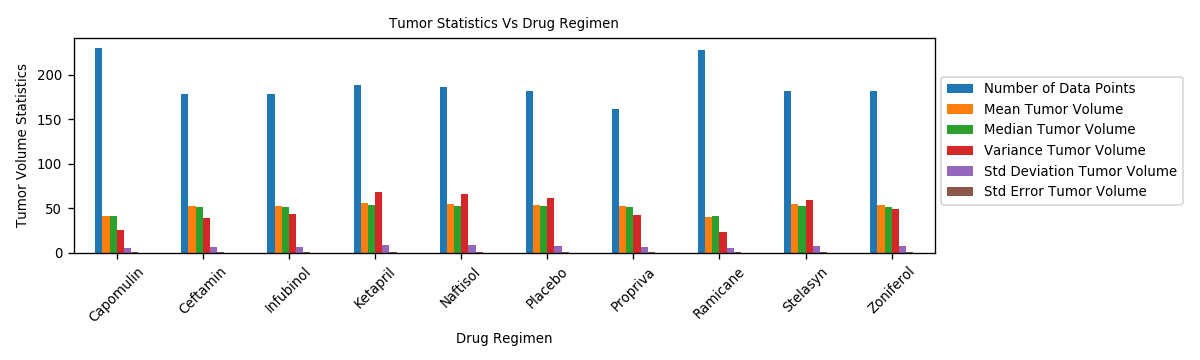

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#considering the number of data points along with the statistics calculated above and plotting a bar graph

Tumor_vol_statistics["Number of Data Points"] = mouse_study_results_grouped["Tumor Volume (mm3)"].count()
Tumor_vol_statistics_arranged = Tumor_vol_statistics[["Number of Data Points","Mean Tumor Volume","Median Tumor Volume","Variance Tumor Volume", "Std Deviation Tumor Volume","Std Error Tumor Volume"]]
bar_plot_pandas = Tumor_vol_statistics_arranged.plot(kind='bar',figsize=(10,3),align = "center",rot = 45,fontsize =8 )
bar_plot_pandas.legend(bbox_to_anchor=(1, 0.85),loc = "upper left",fontsize =8 )

# Set a title and x and y labels for the chart
bar_plot_pandas.set_xlabel("Drug Regimen",fontsize = 8)
bar_plot_pandas.set_ylabel("Tumor Volume Statistics",fontsize = 8)
bar_plot_pandas.set_title("Tumor Statistics Vs Drug Regimen",fontsize = 8)
plt.tight_layout()

plt.show()




<IPython.core.display.Javascript object>


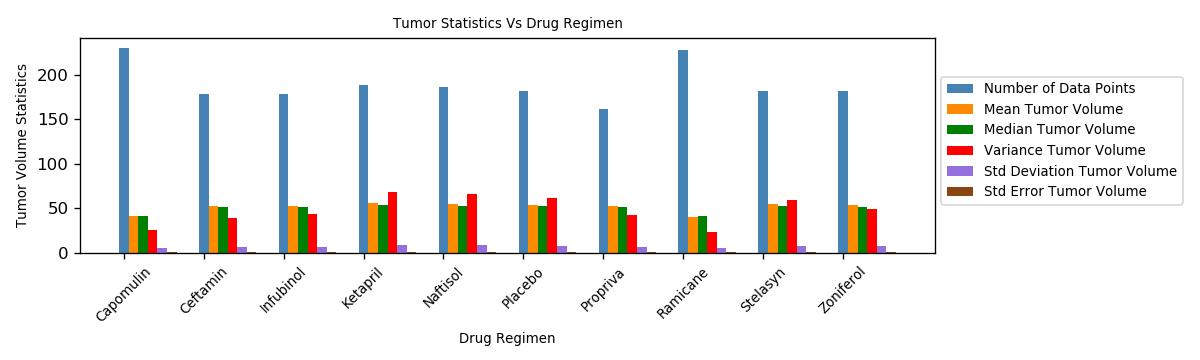

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(Tumor_vol_statistics))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))
width = 0.12 #setting width of the bars

#Plotting the bars one after the other for each statistics data collected in summary
pmean= plt.bar(x_axis, Tumor_vol_statistics_arranged["Number of Data Points"],width, color="steelblue", alpha=1, align="center")
pmean= plt.bar(x_axis+width, Tumor_vol_statistics_arranged["Mean Tumor Volume"],width, color="darkorange", alpha=1, align="center")
pmedian = plt.bar(x_axis+(2*width), Tumor_vol_statistics_arranged["Median Tumor Volume"], width ,color="green", alpha=1, align="center")
pvariance = plt.bar(x_axis+(3*width), Tumor_vol_statistics_arranged["Variance Tumor Volume"], width ,color="red", alpha=1, align="center")
pstd = plt.bar(x_axis+(4*width), Tumor_vol_statistics_arranged["Std Deviation Tumor Volume"], width ,color="mediumpurple", alpha=1, align="center")
pstderr = plt.bar(x_axis+(5*width), Tumor_vol_statistics_arranged["Std Error Tumor Volume"], width ,color="saddlebrown", alpha=1, align="center")

legend_values = Tumor_vol_statistics_arranged.columns

plt.legend((legend_values[0],legend_values[1],legend_values[2],legend_values[3],legend_values[4],legend_values[5]),
           bbox_to_anchor=(1, 0.85),
           loc = "upper left",
           fontsize = 8)

plt.xticks(tick_locations, Tumor_vol_statistics.index, rotation="45",fontsize = 8)

plt.title("Tumor Statistics Vs Drug Regimen",fontsize = 8)
plt.xlabel("Drug Regimen",fontsize = 8)
plt.ylabel("Tumor Volume Statistics",fontsize = 8)
plt.tight_layout()

plt.show()


## Pie plots

<IPython.core.display.Javascript object>


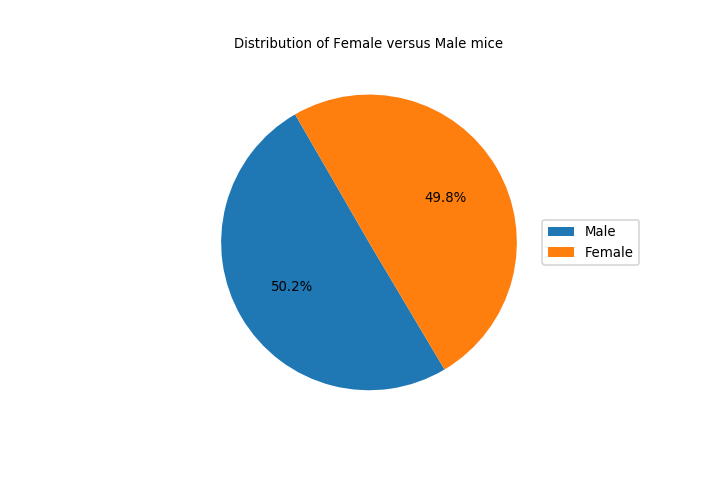

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Mouse metadata DF value counts by sex will give the count of male Vs female mice
Mouse_metadata_by_sex = mouse_metadata["Sex"].value_counts()


pie_plot_pandas = Mouse_metadata_by_sex.plot(kind='pie',autopct = '%1.1f%%',figsize=(6, 4),
                                             labels=None,fontsize = 8,startangle = 120)

pie_plot_pandas.legend(loc="center", labels=Mouse_metadata_by_sex.index,bbox_to_anchor=(1.1, 0.5),fontsize = 8)
pie_plot_pandas.set_title("Distribution of Female versus Male mice",fontsize = 8)
pie_plot_pandas.set(ylabel="")
plt.show()


<IPython.core.display.Javascript object>


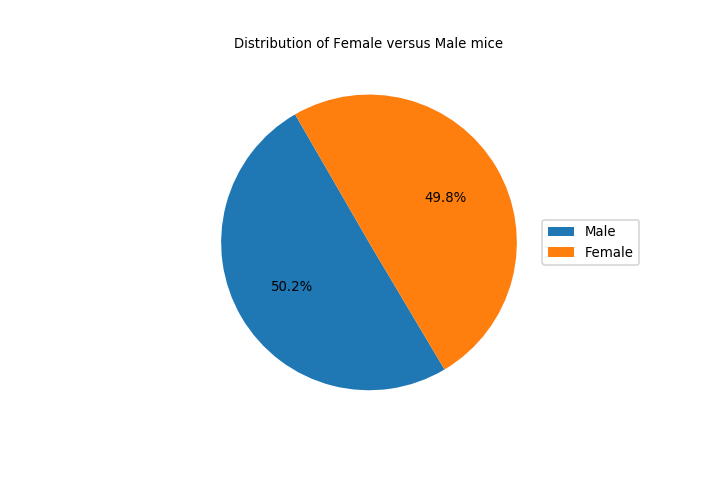

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(6,4))
plt.pie(Mouse_metadata_by_sex,autopct = '%1.1f%%',startangle = 120,textprops={'fontsize': 8})


plt.title("Distribution of Female versus Male mice",fontsize = 8)
plt.legend(loc="center", labels=Mouse_metadata_by_sex.index,bbox_to_anchor=(1.1, 0.5),fontsize = 8)

plt.show()



## Quartiles, outliers and boxplots

In [7]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the IQR and quantitatively determine if there are any potential outliers.


mouse_study_interested_treatments = mouse_study_results_df.loc[(mouse_study_results_df["Drug Regimen"] == "Capomulin")|
                                                               (mouse_study_results_df["Drug Regimen"] == "Ramicane") |
                                                               (mouse_study_results_df["Drug Regimen"] == "Infubinol")| 
                                                               (mouse_study_results_df["Drug Regimen"] == "Ceftamin")]
                                                            



mouse_study_grouped = mouse_study_interested_treatments.groupby(["Drug Regimen","Mouse ID"])
# get the max Timepoint for the data set grouped by mouse ID and Drug regimen
final_timepoint = mouse_study_grouped["Timepoint"].max()
#merge final timepoints  with the main data set, to get the corresponding final tumor volume 
final_result = pd.merge(final_timepoint,mouse_study_interested_treatments,on=["Drug Regimen","Mouse ID","Timepoint"])



#IQR and Outliers calculations for Capomulin
Capomulin_resuts = final_result.loc[(final_result["Drug Regimen"] == "Capomulin")]
Capomulin_quartiles = Capomulin_resuts['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Capomulin_lowerq = Capomulin_quartiles[0.25] 
Capomulin_upperq = Capomulin_quartiles[0.75] 
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr) 
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr) 

print(f"The interquartile range of Capomulin drug regimen response in terms of tumor volume is: {Capomulin_iqr}") 
print(f"Tumor volumes below {Capomulin_lower_bound} could be outliers.") 
print(f"Tumor volumes above {Capomulin_upper_bound} could be outliers.")

#find outliers where tumor volume < lower bound or > upper bound 
outlier_Capomulin = Capomulin_resuts.loc[(Capomulin_resuts['Tumor Volume (mm3)'] < Capomulin_lower_bound) | 
                                         (Capomulin_resuts['Tumor Volume (mm3)'] > Capomulin_upper_bound)]

outlier_Capomulin_details = outlier_Capomulin[["Mouse ID","Weight (g)","Age_months","Tumor Volume (mm3)"]]
outlier_Capomulin_details = outlier_Capomulin_details.reset_index(drop = True)

#print outliers , if any, else print a message that no outliers were found. 
if len(outlier_Capomulin) == 0: 
    print(" However, there are no such outliers identified") 
    
else: 
    print(" Outliers identified below") 
    print(outlier_Capomulin_details)

print("------------------------------------------------------------------------------------------------------------------")


#IQR and Outliers calculations for Ramicane
Ramicane_resuts = final_result.loc[(final_result["Drug Regimen"] == "Ramicane")]
Ramicane_quartiles = Ramicane_resuts['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Ramicane_lowerq = Ramicane_quartiles[0.25] 
Ramicane_upperq = Ramicane_quartiles[0.75] 
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr) 
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr) 

print(f"The interquartile range of Ramicane drug regimen response in terms of tumor volume is: {Ramicane_iqr}") 
print(f"Tumor volumes below {Ramicane_lower_bound} could be outliers.") 
print(f"Tumor volumes above {Ramicane_upper_bound} could be outliers.")

#find outliers where tumor volume < lower bound or > upper bound 
outlier_Ramicane = Ramicane_resuts.loc[(Ramicane_resuts['Tumor Volume (mm3)'] < Ramicane_lower_bound) | 
                                       (Ramicane_resuts['Tumor Volume (mm3)'] > Ramicane_upper_bound)]

outlier_Ramicane_details = outlier_Ramicane[["Mouse ID","Weight (g)","Age_months","Tumor Volume (mm3)"]]
outlier_Ramicane_details = outlier_Ramicane_details.reset_index(drop = True)

#print outliers , if any, else print a message that no outliers were found. 
if len(outlier_Ramicane) == 0: 
    print(" However, there are no such outliers identified") 
    
else: 
    print(" Outliers identified below") 
    print(outlier_Ramicane_details)

print("------------------------------------------------------------------------------------------------------------------")

#IQR and Outliers calculations for Infubinol
Infubinol_resuts = final_result.loc[(final_result["Drug Regimen"] == "Infubinol")]
Infubinol_quartiles = Infubinol_resuts['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Infubinol_lowerq = Infubinol_quartiles[0.25] 
Infubinol_upperq = Infubinol_quartiles[0.75] 
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr) 
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr) 

print(f"The interquartile range of Infubinol drug regimen response in terms of tumor volume is: {Infubinol_iqr}") 
print(f"Tumor volumes below {Infubinol_lower_bound} could be outliers.") 
print(f"Tumor volumes above {Infubinol_upper_bound} could be outliers.")

#find outliers where tumor volume < lower bound or > upper bound 
outlier_Infubinol = Infubinol_resuts.loc[(Infubinol_resuts['Tumor Volume (mm3)'] < Infubinol_lower_bound) | 
                                       (Infubinol_resuts['Tumor Volume (mm3)'] > Infubinol_upper_bound)]

outlier_Infubinol_details = outlier_Infubinol[["Mouse ID","Weight (g)","Age_months","Tumor Volume (mm3)"]]
outlier_Infubinol_details = outlier_Infubinol_details.reset_index(drop = True)

#print outliers , if any, else print a message that no outliers were found. 
if len(outlier_Infubinol) == 0: 
    print(" However, there are no such outliers identified") 
    
else: 
    print(" Outliers identified below") 
    print(outlier_Infubinol_details)

print("------------------------------------------------------------------------------------------------------------------")

# IQR and Outliers calculations for Infubinol
Ceftamin_resuts = final_result.loc[(final_result["Drug Regimen"] == "Ceftamin")]
Ceftamin_quartiles = Ceftamin_resuts['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Ceftamin_lowerq = Ceftamin_quartiles[0.25] 
Ceftamin_upperq = Ceftamin_quartiles[0.75] 
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr) 
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr) 

print(f"The interquartile range of Capomulin drug regimen response in terms of tumor volume is: {Ceftamin_iqr}") 
print(f"Tumor volumes below {Ceftamin_lower_bound} could be outliers.") 
print(f"Tumor volumes above {Ceftamin_upper_bound} could be outliers.")

#find outliers where tumor volume < lower bound or > upper bound 
outlier_Ceftamin = Ceftamin_resuts.loc[(Ceftamin_resuts['Tumor Volume (mm3)'] < Ceftamin_lower_bound) | 
                                       (Ceftamin_resuts['Tumor Volume (mm3)'] > Ceftamin_upper_bound)]

outlier_Ceftamin_details = outlier_Ceftamin[["Mouse ID","Weight (g)","Age_months","Tumor Volume (mm3)"]]
outlier_Ceftamin_details = outlier_Infubinol_details.reset_index(drop = True)

#print outliers , if any, else print a message that no outliers were found. 
if len(outlier_Ceftamin) == 0: 
    print(" However, there are no such outliers identified") 
    
else: 
    print(" Outliers identified below") 
    print(outlier_Ceftamin_details)


The interquartile range of Capomulin drug regimen response in terms of tumor volume is: 7.781863460000004
Tumor volumes below 20.70456164999999 could be outliers.
Tumor volumes above 51.83201549 could be outliers.
 However, there are no such outliers identified
------------------------------------------------------------------------------------------------------------------
The interquartile range of Ramicane drug regimen response in terms of tumor volume is: 9.098536719999998
Tumor volumes below 17.912664470000003 could be outliers.
Tumor volumes above 54.30681135 could be outliers.
 However, there are no such outliers identified
------------------------------------------------------------------------------------------------------------------
The interquartile range of Infubinol drug regimen response in terms of tumor volume is: 11.477135160000003
Tumor volumes below 36.83290494999999 could be outliers.
Tumor volumes above 82.74144559000001 could be outliers.
 Outliers identified belo

<IPython.core.display.Javascript object>


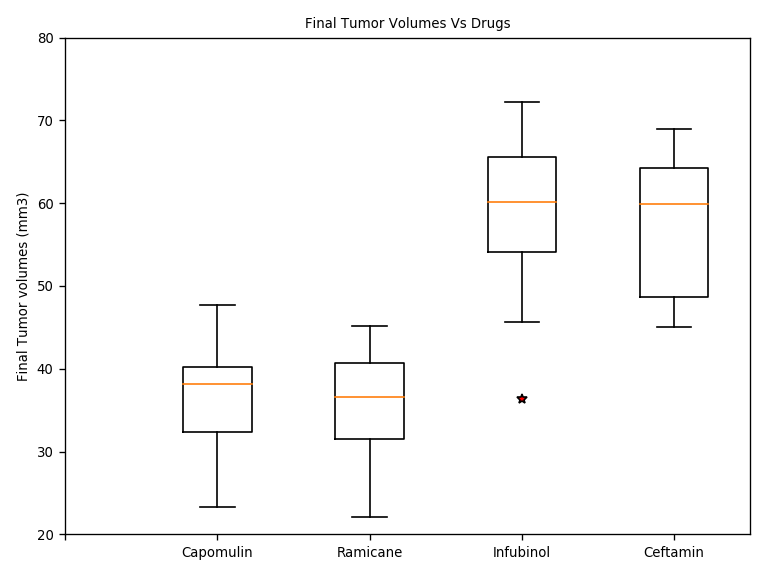

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_resuts["Tumor Volume (mm3)"],Ramicane_resuts["Tumor Volume (mm3)"], 
        Infubinol_resuts["Tumor Volume (mm3)"],Ceftamin_resuts["Tumor Volume (mm3)"]]


#defining the outlier display
red_star = dict(markerfacecolor='r', marker='*')


Drugs = ["","Capomulin","Ramicane","Infubinol","Ceftamin"]
ind = np.arange(len(Drugs))
tick = [value for value in ind]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes Vs Drugs",fontsize = 8)
ax1.set_ylabel('Final Tumor volumes (mm3)',fontsize = 8)

ax1.boxplot(data,flierprops=red_star)

plt.xticks(tick, Drugs,fontsize = 8)
plt.ylim(20,80)
plt.yticks(fontsize = 8)
plt.tight_layout()

plt.show()


## Line and scatter plots

<IPython.core.display.Javascript object>


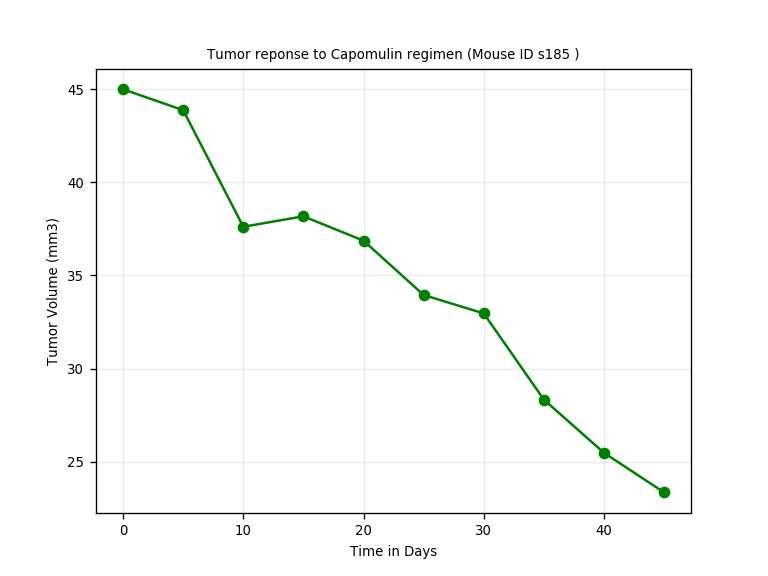

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Capomulin treated mouse ID input s185

Capomulin_resut_set = mouse_study_results_df.loc[(mouse_study_results_df["Drug Regimen"] == "Capomulin")]

mouse_study_Capomulin_s185 = Capomulin_resut_set.loc[(Capomulin_resut_set["Mouse ID"] == "s185")]

Timepoint_in_days = mouse_study_Capomulin_s185["Timepoint"]

Tumor_vol_in_days = mouse_study_Capomulin_s185["Tumor Volume (mm3)"]

plt.plot(Timepoint_in_days,Tumor_vol_in_days,marker="o", color="green")

plt.title("Tumor reponse to Capomulin regimen (Mouse ID s185 )",fontsize =8)
plt.xlabel("Time in Days",fontsize =8)
plt.ylabel("Tumor Volume (mm3)",fontsize =8)

plt.xticks(fontsize =8)
plt.yticks(fontsize =8)
# plt.xlim(-5, 50)
# plt.ylim(10, 50)

plt.grid(alpha = 0.25)
plt.show()



<IPython.core.display.Javascript object>


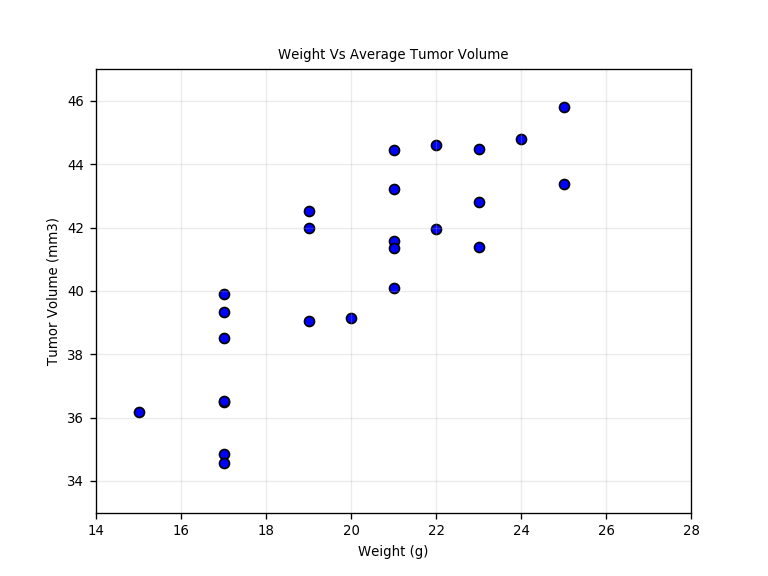

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_study_Capomulin_by_mouse= Capomulin_resut_set.groupby(["Mouse ID"])
Average_tumor_vol_by_mouse = mouse_study_Capomulin_by_mouse["Tumor Volume (mm3)"].mean()
weight_by_mouse = mouse_study_Capomulin_by_mouse["Weight (g)"].max()

plt.scatter(weight_by_mouse,Average_tumor_vol_by_mouse,marker="o", facecolors="b", edgecolors="black")

plt.title("Weight Vs Average Tumor Volume",fontsize =8)
plt.xlabel("Weight (g)",fontsize =8)
plt.ylabel("Tumor Volume (mm3)",fontsize =8)

plt.xlim(14,28)
plt.ylim(33,47)
plt.xticks(fontsize =8)
plt.yticks(fontsize =8)

plt.grid(alpha = 0.25)
plt.show()



In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Corr_Coeff = round(st.pearsonr(weight_by_mouse,Average_tumor_vol_by_mouse)[0],4)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {Corr_Coeff}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.8419


The r-squared value is: 0.8419363424694718


<IPython.core.display.Javascript object>


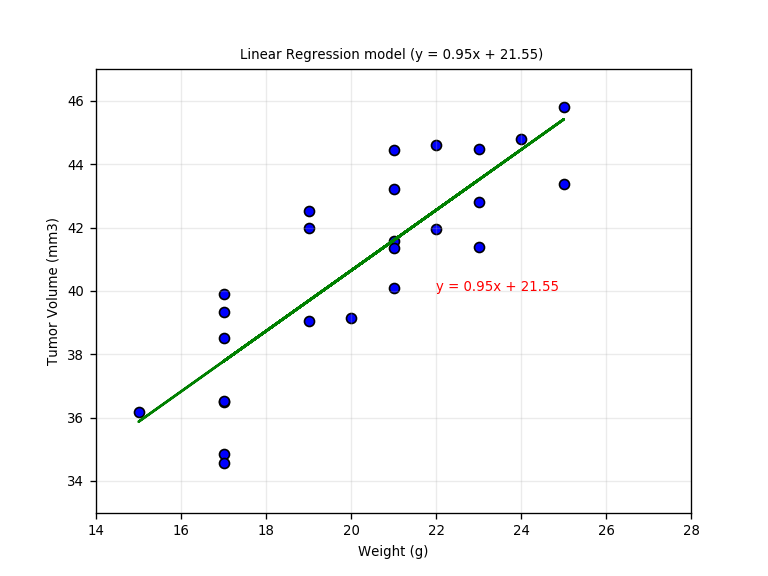

In [12]:
#Linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_by_mouse,Average_tumor_vol_by_mouse)

regress_values = weight_by_mouse * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared value is: {rvalue}")

plt.scatter(weight_by_mouse,Average_tumor_vol_by_mouse,marker="o", facecolors="b", edgecolors="black")
plt.plot(weight_by_mouse,regress_values,"g-")
plt.annotate(line_eq,(22,40),fontsize=8,color="red")

plt.title(f"Linear Regression model ({line_eq}) ",fontsize = 8)
plt.xlabel("Weight (g)",fontsize = 8)
plt.ylabel("Tumor Volume (mm3)",fontsize = 8)

plt.xlim(14,28)
plt.ylim(33,47)
plt.xticks(fontsize =8)
plt.yticks(fontsize =8)

plt.grid(alpha = 0.25)
plt.show()
